In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [2]:
questURL = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1\
           &max_rnk=1\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
Quest = requests.get(questURL).json()
Quest

{'StudyFieldsResponse': {'APIVrs': '1.01.02',
  'DataVrs': '2020:07:28 00:13:26.360',
  'Expression': 'covid 19',
  'NStudiesAvail': 347033,
  'NStudiesFound': 2905,
  'MinRank': 1,
  'MaxRank': 1,
  'NStudiesReturned': 1,
  'FieldList': ['NCTId',
   'BriefTitle',
   'StatusVerifiedDate',
   'CompletionDate',
   'OrgFullName',
   'OrgClass',
   'Keyword',
   'LocationCity',
   'LocationCountry',
   'EnrollmentCount',
   'StdAge',
   'Gender'],
  'StudyFields': [{'Rank': 1,
    'NCTId': ['NCT04395924'],
    'BriefTitle': ['Maternal-foetal Transmission of SARS-Cov-2'],
    'StatusVerifiedDate': ['June 2020'],
    'CompletionDate': ['May 2021'],
    'OrgFullName': ["Centre Hospitalier Régional d'Orléans"],
    'OrgClass': ['OTHER'],
    'Keyword': ['Pregnancy',
     'RT-PCR-COVID-19',
     'SARS-CoV 2 serologies',
     'Placenta',
     'Blood cord',
     'Amniotic fluid'],
    'LocationCity': ['Orléans'],
    'LocationCountry': ['France'],
    'EnrollmentCount': ['50'],
    'StdAge': ['Ad

In [3]:
limit1 = Quest['StudyFieldsResponse']['NStudiesFound'] #make sure we don't ask for results outside of the scope of our query
limit1

2905

In [4]:
tempURL1 = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1\
           &max_rnk=1000\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'   
tempL1 = requests.get(tempURL1).json()

tempURL2 = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1001\
           &max_rnk=2000\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
tempL2 = requests.get(tempURL2).json()                                                             

tempURL3 = f'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=2001\
           &max_rnk={limit1}\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
tempL3 = requests.get(tempURL3).json()

Q1_tempL1 = tempL1['StudyFieldsResponse']['StudyFields']
Q1_tempL2 = tempL2['StudyFieldsResponse']['StudyFields']
Q1_tempL3 = tempL3['StudyFieldsResponse']['StudyFields']

In [5]:
Q1_tempDF1 = pd.DataFrame(Q1_tempL1)
Q1_tempDF2 = pd.DataFrame(Q1_tempL2)
Q1_tempDF3 = pd.DataFrame(Q1_tempL3)

In [6]:
def change_remove45(df):
    df = df.astype(str)
    df["NCTId"] = df["NCTId"].str.lstrip("['")
    df["NCTId"] = df["NCTId"].str.rstrip("']")
    df["BriefTitle"] = df["BriefTitle"].str.lstrip("['")
    df["BriefTitle"] = df["BriefTitle"].str.rstrip("']")
    df["StatusVerifiedDate"] = df["StatusVerifiedDate"].str.lstrip("['")
    df["StatusVerifiedDate"] = df["StatusVerifiedDate"].str.rstrip("']")
    df["CompletionDate"] = df["CompletionDate"].str.lstrip("['")
    df["CompletionDate"] = df["CompletionDate"].str.rstrip("']")
    df["OrgFullName"] = df["OrgFullName"].str.lstrip("['")
    df["OrgFullName"] = df["OrgFullName"].str.rstrip("']")
    df["OrgClass"] = df["OrgClass"].str.lstrip("['")
    df["OrgClass"] = df["OrgClass"].str.rstrip("']")
    df["Keyword"] = df["Keyword"].str.lstrip("['")
    df["Keyword"] = df["Keyword"].str.rstrip("']")
    df["LocationCity"] = df["LocationCity"].str.lstrip("['")
    df["LocationCity"] = df["LocationCity"].str.rstrip("']")
    df["LocationCountry"] = df["LocationCountry"].str.lstrip("['")
    df["LocationCountry"] = df["LocationCountry"].str.rstrip("']")
    df["EnrollmentCount"] = df["EnrollmentCount"].str.lstrip("['")
    df["EnrollmentCount"] = df["EnrollmentCount"].str.rstrip("']")
    df["StdAge"] = df["StdAge"].str.lstrip("['")
    df["StdAge"] = df["StdAge"].str.rstrip("']")
    df["Gender"] = df["Gender"].str.lstrip("['")
    df["Gender"] = df["Gender"].str.rstrip("']")
    df["LocationFacility"] = df["LocationFacility"].str.lstrip("['")
    df["LocationFacility"] = df["LocationFacility"].str.rstrip("']")
    df["StartDate"] = df["StartDate"].str.lstrip("['")
    df["StartDate"] = df["StartDate"].str.rstrip("']")
    df["LocationStatus"] = df["LocationStatus"].str.lstrip("['")
    df["LocationStatus"] = df["LocationStatus"].str.rstrip("']")
    df["NCTId"] = df["NCTId"].str.replace("'","")
    df["BriefTitle"] = df["BriefTitle"].str.replace("'","")
    df["StatusVerifiedDate"] = df["StatusVerifiedDate"].str.replace("'","")
    df["CompletionDate"] = df["CompletionDate"].str.replace("'","")
    df["OrgFullName"] = df["OrgFullName"].str.replace("'","")
    df["OrgClass"] = df["OrgClass"].str.replace("'","")
    df["Keyword"] = df["Keyword"].str.replace("'","")
    df["LocationCity"] = df["LocationCity"].str.replace("'","")
    df["LocationCountry"] = df["LocationCountry"].str.replace("'","")
    df["EnrollmentCount"] = df["EnrollmentCount"].str.replace("'","")
    df["StdAge"] = df["StdAge"].str.replace("'","")
    df["Gender"] = df["Gender"].str.replace("'","")
    df["StartDate"] = df["StartDate"].str.replace("'","")
    df["LocationFacility"] = df["LocationFacility"].str.replace("'","")
    df["LocationFacility"] = df["LocationStatus"].str.replace("'","")
    df["EnrollmentCount"] = pd.to_numeric(df["EnrollmentCount"])
    return df 

In [7]:
clean_Q1_tempDF3 = change_remove45(Q1_tempDF3)
clean_Q1_tempDF3

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,2001,NCT04472728,Testing the Efficacy and Safety of BIO101 for ...,July 2020,"June 16, 2020",September 2021,Biophytis,INDUSTRY,,Recruiting,Recruiting,Mechelen,Belgium,310.0,"Adult, Older Adult",All
1,2002,NCT04350086,Use of Dexmedetomidine in Light to Moderate Se...,April 2020,"April 20, 2020","November 20, 2020","University Hospital, Limoges",OTHER,"COVID-19, sars-cov-2, infection, respiratory f...",,,Limoges,France,10.0,"Adult, Older Adult",All
2,2003,NCT04369469,Efficacy and Safety Study of IV Ravulizumab in...,April 2020,"May 11, 2020",February 2021,Alexion Pharmaceuticals,INDUSTRY,"acute lung injury, acute respiratory distress ...","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Washington, Boston, Detroit, Créteil, Garches,...","United States, United States, United States, F...",270.0,"Adult, Older Adult",All
3,2004,NCT04357860,Clinical Trial of Sarilumab in Adults With COV...,April 2020,"April 27, 2020","July 27, 2020",Maimónides Biomedical Research Institute of Có...,OTHER,,,,Córdoba,Spain,120.0,"Adult, Older Adult",All
4,2005,NCT04334148,Healthcare Worker Exposure Response and Outcom...,July 2020,"April 22, 2020",September 2020,Duke University,OTHER,"Hydroxychloroquine, Coronavirus Infections, No...","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Aurora, Gainesville, Jacksonville, Leesburg, M...","United States, United States, United States, U...",2000.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,2901,NCT03728257,Lung Transplant G0 (LTGO): Improving Self-Mana...,June 2020,"March 25, 2019","April 8, 2022",University of Pittsburgh,OTHER,,Recruiting,Recruiting,Pittsburgh,United States,112.0,"Adult, Older Adult",All
901,2902,NCT03823469,Evaluating the Impact of a Culinary Coaching T...,May 2020,"May 20, 2019",February 2022,Spaulding Rehabilitation Hospital,OTHER,"Home cooking, Telemedicine, Nutrition, Health ...","Completed, Recruiting","Completed', 'Recruiting","Charlestown, Ramat Gan","United States, Israel",78.0,"Adult, Older Adult",All
902,2903,NCT04429061,Reaching 90 90 90 in Adolescents in Zambia: Us...,June 2020,"March 1, 2020","June 30, 2023",University of Alabama at Birmingham,OTHER,"Adolescents, Zambia, Football",Recruiting,Recruiting,Lusaka,Zambia,3200.0,"Child, Adult, Older Adult",Female
903,2904,NCT03922334,Navigating New Motherhood 2,June 2020,"January 21, 2020",December 2024,Northwestern University,OTHER,,Recruiting,Recruiting,Chicago,United States,400.0,"Child, Adult",Female


In [8]:
clean_Q1_tempDF2 = change_remove45(Q1_tempDF2)
clean_Q1_tempDF2

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,1001,NCT04407273,STATIN THERAPY AND COVID-19 INFECTION,May 2020,"May 14, 2020","June 30, 2020",Institut Investigacio Sanitaria Pere Virgili,OTHER,,Recruiting,Recruiting,Reus,Spain,1200.0,"Adult, Older Adult",All
1,1002,NCT04403100,Hydroxychloroquine and Lopinavir/ Ritonavir to...,June 2020,"June 3, 2020","November 28, 2020",Cardresearch,OTHER,,"Recruiting, Not yet recruiting, Recruiting, No...","Recruiting', 'Not yet recruiting', 'Recruiting...","Belo Horizonte, Belo Horizonte, Betim, Ouro Preto","Brazil, Brazil, Brazil, Brazil",1968.0,"Adult, Older Adult",All
2,1003,NCT04391712,Cold Laser Therapy for COVID-19 Positive Patie...,May 2020,"April 30, 2020","June 30, 2020",Lowell General Hospital,OTHER,"COVID, Laser, Pulmonary",Recruiting,Recruiting,Lowell,United States,20.0,"Adult, Older Adult",All
3,1004,NCT04338672,The Impact of the Covid-19 Outbreak on Emergen...,April 2020,"April 5, 2020","April 1, 2022",Sheba Medical Center,OTHER_GOV,"Emergency, Surgery, Covid-19",Recruiting,Recruiting,Ramat Gan,Israel,10000.0,"Adult, Older Adult",All
4,1005,NCT04431466,A Study to Compare the Efficacy and Safety of ...,June 2020,"July 1, 2020","July 1, 2021",Universidade Federal de Sao Carlos,OTHER,"coronavirus infections, SARS-CoV-2, COVID-19, ...",,,São Carlos,Brazil,64.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1996,NCT04392713,Efficacy of Ivermectin in COVID-19,May 2020,"April 15, 2020",July 2020,"Combined Military Hospital, Pakistan",OTHER,,Recruiting,Recruiting,Lahore,Pakistan,100.0,"Child, Adult, Older Adult",All
996,1997,NCT04424056,"A Trial Using ANAKINRA, TOCILIZUMAB Alone or i...",June 2020,"September 1, 2020","November 1, 2022",Assistance Publique Hopitaux De Marseille,OTHER,,,,Marseille,France,216.0,"Adult, Older Adult",All
997,1998,NCT04484025,SPI-1005 Treatment in Moderate COVID-19 Patients,July 2020,August 2020,December 2020,"Sound Pharmaceuticals, Incorporated",INDUSTRY,"ebselen, SPI-1005, Covid-19, Covid",,,,,60.0,"Adult, Older Adult",All
998,1999,NCT04344210,Impact of Tele-interventions During the COVID-...,April 2020,"April 17, 2020","August 30, 2020",Federal University of Rio Grande do Sul,OTHER,"COVID-19, Diabetes Mellitus, Glycemic control,...",,,Porto Alegre,Brazil,149.0,"Adult, Older Adult",All


In [9]:
clean_Q1_tempDF1 = change_remove45(Q1_tempDF1)
clean_Q1_tempDF1

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,1,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,May 2020,"April 15, 2020","October 15, 2020",University of Milano Bicocca,OTHER,"Lung injury, sars-covid-2, coronavirus infection","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Bergamo, Bergamo, Ferrara, Lecco, Melzo, Monza...","Italy, Italy, Italy, Italy, Italy, Italy, Ital...",500.0,"Adult, Older Adult",All
1,2,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,June 2020,"May 5, 2020",May 2021,"""Centre Hospitalier Régional dOrléans""",OTHER,"Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...",Recruiting,Recruiting,Orléans,France,50.0,Adult,Female
2,3,NCT04476940,COVID-19 Breastfeeding Guideline for African-A...,July 2020,September 2020,June 2022,Meharry Medical College,OTHER,"COVID-19, Exclusive Breastfeeding, Breastfeedi...",,,Nashville,United States,200.0,Adult,Female
3,4,NCT04412265,Frailty in Elderly Patients With COVID-19,June 2020,"March 1, 2020","March 1, 2021",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infecti...",Recruiting,Recruiting,Monza,Italy,300.0,"Adult, Older Adult",All
4,5,NCT04427332,Smell and Taste Disorders in COVID-19 Patients,June 2020,"May 15, 2020","September 30, 2020",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infection",Recruiting,Recruiting,Monza,Italy,500.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,NCT04420247,Efficacy of Chloroquine or Hydroxychloroquine ...,June 2020,"April 16, 2020","August 31, 2020",Centro de Estudos e Pesquisa em Emergencias Me...,OTHER,"VIRAL PNEUMONIA, CORONAVIRUS, COVID-19, COVID,...",Recruiting,Recruiting,Curitiba,Brazil,100.0,"Adult, Older Adult",All
996,997,NCT04397718,Hormonal Intervention for the Treatment in Vet...,July 2020,"July 6, 2020","December 6, 2020",VA Office of Research and Development,FED,,"Recruiting, Recruiting, Recruiting, Recruiting","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","West Los Angeles, Brooklyn, New York, Seattle","United States, United States, United States, U...",198.0,"Adult, Older Adult",Male
997,998,NCT04352842,Echocardiographic Manifestation in Patient Wit...,April 2020,"January 21, 2020","April 8, 2020",RenJi Hospital,OTHER,"COVID-19, Echocardiography, cardiac structure,...",,,Shanghai,China,51.0,"Adult, Older Adult",All
998,999,NCT04479358,Low-dose Tocilizumab Versus Standard of Care i...,July 2020,"August 5, 2020","March 1, 2021",University of Chicago,OTHER,"COVID-19, Tocilizumab",,,Chicago,United States,332.0,"Adult, Older Adult",All


In [10]:
query = 'coronavirus'
quest2URL = f'http://ClinicalTrials.gov/api/query/study_fields?expr={query}\
           &min_rnk=1\
           &max_rnk=1\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
Quest2 = requests.get(quest2URL).json()
Quest2

{'StudyFieldsResponse': {'APIVrs': '1.01.02',
  'DataVrs': '2020:07:28 00:13:26.360',
  'Expression': 'coronavirus',
  'NStudiesAvail': 347033,
  'NStudiesFound': 1472,
  'MinRank': 1,
  'MaxRank': 1,
  'NStudiesReturned': 1,
  'FieldList': ['NCTId',
   'BriefTitle',
   'StatusVerifiedDate',
   'StartDate',
   'CompletionDate',
   'OrgFullName',
   'OrgClass',
   'Keyword',
   'LocationFacility',
   'LocationStatus',
   'LocationCity',
   'LocationCountry',
   'EnrollmentCount',
   'StdAge',
   'Gender'],
  'StudyFields': [{'Rank': 1,
    'NCTId': ['NCT04279795'],
    'BriefTitle': ['Detection of 2019 Novel Coronavirus in Multiple Organ System and Its Relationship With Clinical Manifestations'],
    'StatusVerifiedDate': ['February 2020'],
    'StartDate': ['January 20, 2020'],
    'CompletionDate': ['February 28, 2021'],
    'OrgFullName': ['Third Affiliated Hospital, Sun Yat-Sen University'],
    'OrgClass': ['OTHER'],
    'Keyword': ['2019 Novel Coronavirus'],
    'LocationFacility'

In [11]:

limit2 = Quest2['StudyFieldsResponse']['NStudiesFound'] #make sure we don't ask for results outside of the scope of our query
limit2

1472

In [12]:
tempURL1 = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1\
           &max_rnk=1000\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'   

tempL1 = requests.get(tempURL1).json()

tempURL2 = f'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1001\
           &max_rnk={limit2}\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
tempL2 = requests.get(tempURL2).json()                                                             

Q2_tempL1 = tempL1['StudyFieldsResponse']['StudyFields']
Q2_tempL2 = tempL2['StudyFieldsResponse']['StudyFields']

In [13]:

Q2_tempDF1 = pd.DataFrame(Q2_tempL1)
Q2_tempDF2 = pd.DataFrame(Q2_tempL2)

In [14]:
clean_Q2_tempDF1 = change_remove45(Q2_tempDF1)
clean_Q2_tempDF1

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,1,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,June 2020,"May 5, 2020",May 2021,"""Centre Hospitalier Régional dOrléans""",OTHER,"Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...",Recruiting,Recruiting,Orléans,France,50.0,Adult,Female
1,2,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,May 2020,"April 15, 2020","October 15, 2020",University of Milano Bicocca,OTHER,"Lung injury, sars-covid-2, coronavirus infection","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Bergamo, Bergamo, Ferrara, Lecco, Melzo, Monza...","Italy, Italy, Italy, Italy, Italy, Italy, Ital...",500.0,"Adult, Older Adult",All
2,3,NCT04476940,COVID-19 Breastfeeding Guideline for African-A...,July 2020,September 2020,June 2022,Meharry Medical College,OTHER,"COVID-19, Exclusive Breastfeeding, Breastfeedi...",,,Nashville,United States,200.0,Adult,Female
3,4,NCT04367805,COVID-19 Infection in Patients With Hepatocell...,April 2020,"April 27, 2020",October 2020,"Centre Hospitalier Universitaire, Amiens",OTHER,"Hepatocellular Carcinoma, COVID-19, Coronaviru...",Recruiting,Recruiting,Amiens,France,50.0,"Adult, Older Adult",All
4,5,NCT04473170,Study Evaluating the Safety and Efficacy of Au...,July 2020,"April 4, 2020","July 14, 2020",Abu Dhabi Stem Cells Center,OTHER_GOV,"COVID-19, Non-Hematopoietic Peripheral Blood S...",,,Abu Dhabi,United Arab Emirates,146.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,NCT04449380,Clinical Study for the Treatment With Interfer...,June 2020,July 2020,April 2021,IRCCS San Raffaele,OTHER,,,,Milano,Italy,126.0,"Adult, Older Adult",All
996,997,NCT04385849,Study of the Safety of Therapeutic Treatment W...,May 2020,"June 1, 2020","July 11, 2020","ImmunityBio, Inc.",INDUSTRY,,,,,,30.0,"Adult, Older Adult",All
997,998,NCT04323644,Outcomes of Surgery in COVID-19 Infection: Int...,May 2020,"January 1, 2020","September 30, 2020",University of Birmingham,OTHER,"COVID-19, Coronavirus, Surgery",Recruiting,Recruiting,Madrid,Spain,1000.0,"Child, Adult, Older Adult",All
998,999,NCT04354441,Effect of Hydroxychloroquine in COVID-19 Posit...,June 2020,May 2020,May 2020,Sir Mortimer B. Davis - Jewish General Hospital,OTHER,"COVID-19, SARS-CoV-2, Pregnancy, hydroxychloro...",,,,,0.0,Adult,Female


In [15]:
clean_Q2_tempDF2 = change_remove45(Q2_tempDF2)
clean_Q2_tempDF2

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,1001,NCT04407273,STATIN THERAPY AND COVID-19 INFECTION,May 2020,"May 14, 2020","June 30, 2020",Institut Investigacio Sanitaria Pere Virgili,OTHER,,Recruiting,Recruiting,Reus,Spain,1200.0,"Adult, Older Adult",All
1,1002,NCT04403100,Hydroxychloroquine and Lopinavir/ Ritonavir to...,June 2020,"June 3, 2020","November 28, 2020",Cardresearch,OTHER,,"Recruiting, Not yet recruiting, Recruiting, No...","Recruiting', 'Not yet recruiting', 'Recruiting...","Belo Horizonte, Belo Horizonte, Betim, Ouro Preto","Brazil, Brazil, Brazil, Brazil",1968.0,"Adult, Older Adult",All
2,1003,NCT04391712,Cold Laser Therapy for COVID-19 Positive Patie...,May 2020,"April 30, 2020","June 30, 2020",Lowell General Hospital,OTHER,"COVID, Laser, Pulmonary",Recruiting,Recruiting,Lowell,United States,20.0,"Adult, Older Adult",All
3,1004,NCT04338672,The Impact of the Covid-19 Outbreak on Emergen...,April 2020,"April 5, 2020","April 1, 2022",Sheba Medical Center,OTHER_GOV,"Emergency, Surgery, Covid-19",Recruiting,Recruiting,Ramat Gan,Israel,10000.0,"Adult, Older Adult",All
4,1005,NCT04431466,A Study to Compare the Efficacy and Safety of ...,June 2020,"July 1, 2020","July 1, 2021",Universidade Federal de Sao Carlos,OTHER,"coronavirus infections, SARS-CoV-2, COVID-19, ...",,,São Carlos,Brazil,64.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1468,NCT04409535,Effects of the COVID-19 Health Emergency on Bi...,May 2020,"May 7, 2020","March 31, 2021",University of New Mexico,OTHER,"Quality of Life, Rural Community, COVID-19",,,Albuquerque,United States,500.0,"Adult, Older Adult",All
468,1469,NCT04374019,Novel Agents for Treatment of High-risk COVID-...,July 2020,"May 1, 2020",May 2021,University of Kentucky,OTHER,high-risk,Recruiting,Recruiting,Lexington,United States,240.0,"Adult, Older Adult",All
469,1470,NCT04380792,Prevalence of DVT or PE in Patients Infected W...,May 2020,"April 13, 2020","June 30, 2025",Foundation for the study of VTE diseases. (FUE...,OTHER,,Recruiting,Recruiting,Badalona,Spain,5000.0,"Child, Adult, Older Adult",All
470,1471,NCT04346667,Post-Exposure Prophylaxis for Asymptomatic SAR...,April 2020,"April 14, 2020","June 30, 2021","Government of Punjab, Specialized Healthcare a...",OTHER_GOV,,"Recruiting, Recruiting, Recruiting","Recruiting', 'Recruiting', 'Recruiting","Lahore, Lahore, Lahore","Pakistan, Pakistan, Pakistan",400.0,Adult,All


In [16]:
DF_QQ = pd.concat([clean_Q1_tempDF1, clean_Q1_tempDF2, clean_Q1_tempDF3, clean_Q2_tempDF1, clean_Q2_tempDF2], ignore_index=True)
DF_QQ = DF_QQ.drop_duplicates()
DF_QQ

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,1,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,May 2020,"April 15, 2020","October 15, 2020",University of Milano Bicocca,OTHER,"Lung injury, sars-covid-2, coronavirus infection","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Bergamo, Bergamo, Ferrara, Lecco, Melzo, Monza...","Italy, Italy, Italy, Italy, Italy, Italy, Ital...",500.0,"Adult, Older Adult",All
1,2,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,June 2020,"May 5, 2020",May 2021,"""Centre Hospitalier Régional dOrléans""",OTHER,"Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...",Recruiting,Recruiting,Orléans,France,50.0,Adult,Female
2,3,NCT04476940,COVID-19 Breastfeeding Guideline for African-A...,July 2020,September 2020,June 2022,Meharry Medical College,OTHER,"COVID-19, Exclusive Breastfeeding, Breastfeedi...",,,Nashville,United States,200.0,Adult,Female
3,4,NCT04412265,Frailty in Elderly Patients With COVID-19,June 2020,"March 1, 2020","March 1, 2021",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infecti...",Recruiting,Recruiting,Monza,Italy,300.0,"Adult, Older Adult",All
4,5,NCT04427332,Smell and Taste Disorders in COVID-19 Patients,June 2020,"May 15, 2020","September 30, 2020",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infection",Recruiting,Recruiting,Monza,Italy,500.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,996,NCT04449380,Clinical Study for the Treatment With Interfer...,June 2020,July 2020,April 2021,IRCCS San Raffaele,OTHER,,,,Milano,Italy,126.0,"Adult, Older Adult",All
3901,997,NCT04385849,Study of the Safety of Therapeutic Treatment W...,May 2020,"June 1, 2020","July 11, 2020","ImmunityBio, Inc.",INDUSTRY,,,,,,30.0,"Adult, Older Adult",All
3902,998,NCT04323644,Outcomes of Surgery in COVID-19 Infection: Int...,May 2020,"January 1, 2020","September 30, 2020",University of Birmingham,OTHER,"COVID-19, Coronavirus, Surgery",Recruiting,Recruiting,Madrid,Spain,1000.0,"Child, Adult, Older Adult",All
3903,999,NCT04354441,Effect of Hydroxychloroquine in COVID-19 Posit...,June 2020,May 2020,May 2020,Sir Mortimer B. Davis - Jewish General Hospital,OTHER,"COVID-19, SARS-CoV-2, Pregnancy, hydroxychloro...",,,,,0.0,Adult,Female


In [17]:
dupe_dupe = DF_QQ.pivot_table(index=['NCTId'], aggfunc='size')
print (dupe_dupe)

NCTId
NCT01306084    1
NCT02517489    1
NCT02656381    1
NCT02735707    1
NCT02765191    1
              ..
NCT04488588    2
NCT04488796    1
NCT04489407    1
NCT04489446    1
NCT04489628    1
Length: 2855, dtype: int64


In [18]:
df_final = DF_QQ.drop_duplicates(subset='NCTId', keep="first")
df_final

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,1,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,May 2020,"April 15, 2020","October 15, 2020",University of Milano Bicocca,OTHER,"Lung injury, sars-covid-2, coronavirus infection","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Bergamo, Bergamo, Ferrara, Lecco, Melzo, Monza...","Italy, Italy, Italy, Italy, Italy, Italy, Ital...",500.0,"Adult, Older Adult",All
1,2,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,June 2020,"May 5, 2020",May 2021,"""Centre Hospitalier Régional dOrléans""",OTHER,"Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...",Recruiting,Recruiting,Orléans,France,50.0,Adult,Female
2,3,NCT04476940,COVID-19 Breastfeeding Guideline for African-A...,July 2020,September 2020,June 2022,Meharry Medical College,OTHER,"COVID-19, Exclusive Breastfeeding, Breastfeedi...",,,Nashville,United States,200.0,Adult,Female
3,4,NCT04412265,Frailty in Elderly Patients With COVID-19,June 2020,"March 1, 2020","March 1, 2021",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infecti...",Recruiting,Recruiting,Monza,Italy,300.0,"Adult, Older Adult",All
4,5,NCT04427332,Smell and Taste Disorders in COVID-19 Patients,June 2020,"May 15, 2020","September 30, 2020",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infection",Recruiting,Recruiting,Monza,Italy,500.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,995,NCT04346043,To Access the Egyptian COVID-19 Whole Genome b...,April 2020,"April 20, 2020","December 1, 2020",Ain Shams University,OTHER,Egypt,,,Cairo,Egypt,100.0,"Adult, Older Adult",All
3900,996,NCT04449380,Clinical Study for the Treatment With Interfer...,June 2020,July 2020,April 2021,IRCCS San Raffaele,OTHER,,,,Milano,Italy,126.0,"Adult, Older Adult",All
3901,997,NCT04385849,Study of the Safety of Therapeutic Treatment W...,May 2020,"June 1, 2020","July 11, 2020","ImmunityBio, Inc.",INDUSTRY,,,,,,30.0,"Adult, Older Adult",All
3902,998,NCT04323644,Outcomes of Surgery in COVID-19 Infection: Int...,May 2020,"January 1, 2020","September 30, 2020",University of Birmingham,OTHER,"COVID-19, Coronavirus, Surgery",Recruiting,Recruiting,Madrid,Spain,1000.0,"Child, Adult, Older Adult",All


In [19]:
df_final.set_index('NCTId', inplace=True)
df_final

,Rank,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
NCTId,,,,,,,,,,,,,,,
NCT04395482,1,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,May 2020,"April 15, 2020","October 15, 2020",University of Milano Bicocca,OTHER,"Lung injury, sars-covid-2, coronavirus infection","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Bergamo, Bergamo, Ferrara, Lecco, Melzo, Monza...","Italy, Italy, Italy, Italy, Italy, Italy, Ital...",500.0,"Adult, Older Adult",All
NCT04395924,2,Maternal-foetal Transmission of SARS-Cov-2,June 2020,"May 5, 2020",May 2021,"""Centre Hospitalier Régional dOrléans""",OTHER,"Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...",Recruiting,Recruiting,Orléans,France,50.0,Adult,Female
NCT04476940,3,COVID-19 Breastfeeding Guideline for African-A...,July 2020,September 2020,June 2022,Meharry Medical College,OTHER,"COVID-19, Exclusive Breastfeeding, Breastfeedi...",,,Nashville,United States,200.0,Adult,Female
NCT04412265,4,Frailty in Elderly Patients With COVID-19,June 2020,"March 1, 2020","March 1, 2021",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infecti...",Recruiting,Recruiting,Monza,Italy,300.0,"Adult, Older Adult",All
NCT04427332,5,Smell and Taste Disorders in COVID-19 Patients,June 2020,"May 15, 2020","September 30, 2020",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infection",Recruiting,Recruiting,Monza,Italy,500.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT04346043,995,To Access the Egyptian COVID-19 Whole Genome b...,April 2020,"April 20, 2020","December 1, 2020",Ain Shams University,OTHER,Egypt,,,Cairo,Egypt,100.0,"Adult, Older Adult",All
NCT04449380,996,Clinical Study for the Treatment With Interfer...,June 2020,July 2020,April 2021,IRCCS San Raffaele,OTHER,,,,Milano,Italy,126.0,"Adult, Older Adult",All
NCT04385849,997,Study of the Safety of Therapeutic Treatment W...,May 2020,"June 1, 2020","July 11, 2020","ImmunityBio, Inc.",INDUSTRY,,,,,,30.0,"Adult, Older Adult",All


In [20]:
bins = [0, 100, 250, 500, 1000, 2500, 5000, 10000, 50000, 100000, 1000000000]
df_final['binned'] = pd.cut(df_final['EnrollmentCount'], bins)
df_final

/opt/anaconda3/envs/PythonData3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rank,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender,binned
NCTId,,,,,,,,,,,,,,,,
NCT04395482,1,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,May 2020,"April 15, 2020","October 15, 2020",University of Milano Bicocca,OTHER,"Lung injury, sars-covid-2, coronavirus infection","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Bergamo, Bergamo, Ferrara, Lecco, Melzo, Monza...","Italy, Italy, Italy, Italy, Italy, Italy, Ital...",500.0,"Adult, Older Adult",All,"(250, 500]"
NCT04395924,2,Maternal-foetal Transmission of SARS-Cov-2,June 2020,"May 5, 2020",May 2021,"""Centre Hospitalier Régional dOrléans""",OTHER,"Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...",Recruiting,Recruiting,Orléans,France,50.0,Adult,Female,"(0, 100]"
NCT04476940,3,COVID-19 Breastfeeding Guideline for African-A...,July 2020,September 2020,June 2022,Meharry Medical College,OTHER,"COVID-19, Exclusive Breastfeeding, Breastfeedi...",,,Nashville,United States,200.0,Adult,Female,"(100, 250]"
NCT04412265,4,Frailty in Elderly Patients With COVID-19,June 2020,"March 1, 2020","March 1, 2021",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infecti...",Recruiting,Recruiting,Monza,Italy,300.0,"Adult, Older Adult",All,"(250, 500]"
NCT04427332,5,Smell and Taste Disorders in COVID-19 Patients,June 2020,"May 15, 2020","September 30, 2020",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infection",Recruiting,Recruiting,Monza,Italy,500.0,"Adult, Older Adult",All,"(250, 500]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT04346043,995,To Access the Egyptian COVID-19 Whole Genome b...,April 2020,"April 20, 2020","December 1, 2020",Ain Shams University,OTHER,Egypt,,,Cairo,Egypt,100.0,"Adult, Older Adult",All,"(0, 100]"
NCT04449380,996,Clinical Study for the Treatment With Interfer...,June 2020,July 2020,April 2021,IRCCS San Raffaele,OTHER,,,,Milano,Italy,126.0,"Adult, Older Adult",All,"(100, 250]"
NCT04385849,997,Study of the Safety of Therapeutic Treatment W...,May 2020,"June 1, 2020","July 11, 2020","ImmunityBio, Inc.",INDUSTRY,,,,,,30.0,"Adult, Older Adult",All,"(0, 100]"


In [21]:
df_enrollment = df_final.groupby("binned")[["BriefTitle"]].count()

In [22]:
df_enrollment = df_enrollment.reset_index()
df_enrollment

,binned,BriefTitle
0,"(0, 100]",1107
1,"(100, 250]",564
2,"(250, 500]",427
3,"(500, 1000]",285
4,"(1000, 2500]",192
5,"(2500, 5000]",97
6,"(5000, 10000]",55
7,"(10000, 50000]",49
8,"(50000, 100000]",12
9,"(100000, 1000000000]",21


Text(0.5, 1.0, 'Number of Studies by Enrollment')

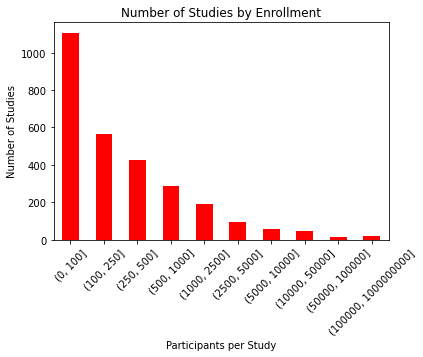

In [23]:
enrollment_bar = df_enrollment.plot.bar(x='binned', y='BriefTitle', rot=45, legend=False, color="r")
plt.xlabel('Participants per Study')
plt.ylabel('Number of Studies')
plt.title('Number of Studies by Enrollment')

In [24]:
df_age = df_final.groupby("StdAge")[["BriefTitle"]].count()
df_age

,BriefTitle
StdAge,
Adult,146
"Adult, Older Adult",2161
Child,27
"Child, Adult",42
"Child, Adult, Older Adult",445
Older Adult,34


In [25]:
df_age = df_age.reset_index()
df_age

,StdAge,BriefTitle
0,Adult,146
1,"Adult, Older Adult",2161
2,Child,27
3,"Child, Adult",42
4,"Child, Adult, Older Adult",445
5,Older Adult,34


In [27]:
df_age = df_age.sort_values(by='BriefTitle', ascending=False)
df_age

,StdAge,BriefTitle
1,"Adult, Older Adult",2161
4,"Child, Adult, Older Adult",445
0,Adult,146
3,"Child, Adult",42
5,Older Adult,34
2,Child,27


Text(0.5, 1.0, 'Number of Studies by Target Age Group')

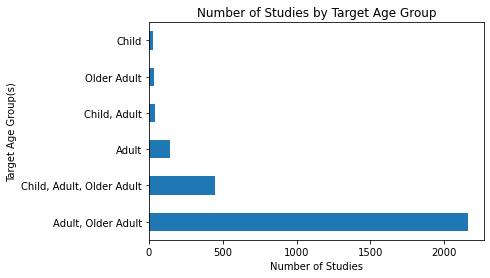

In [28]:
age_bar = df_age.plot.barh(x='StdAge', y='BriefTitle', rot=0, legend=False)
plt.xlabel('Number of Studies')
plt.ylabel('Target Age Group(s)')
plt.title('Number of Studies by Target Age Group')


In [29]:
df_gender = df_final.groupby("Gender")[["BriefTitle"]].count()
df_gender

,BriefTitle
Gender,
,5
All,2760
Female,70
Male,20


In [30]:
df_gender_clean = df_gender.drop("")
df_gender_clean = df_gender_clean.reset_index()
df_gender_clean

,Gender,BriefTitle
0,All,2760
1,Female,70
2,Male,20


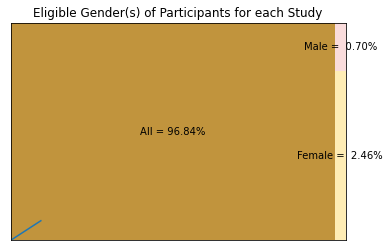

In [34]:
import squarify
color_list = ['#b2790c', '#ffe9a3',
              '#f9d4d4', '#d35158', '#ea3033']
perc = [str('{:5.2f}'.format(i/df_gender_clean['BriefTitle'].sum()*100)) + "%" for i in df_gender_clean['BriefTitle']]
lbl = [el[0] + " = " + el[1] for el in zip(df_gender_clean['Gender'], perc)]
plt.plot(range(10))
squarify.plot(sizes=df_gender_clean['BriefTitle'], label=lbl, alpha=.8, color=color_list)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.title("Eligible Gender(s) of Participants for each Study")
plt.show()